# Exercise: Boston house prices (MLP regression)

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

In [45]:
#loading the dataset direclty from sklearn
boston = datasets.load_boston()
X = boston.data
y = boston.target
print(boston.feature_names)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

<AxesSubplot:>

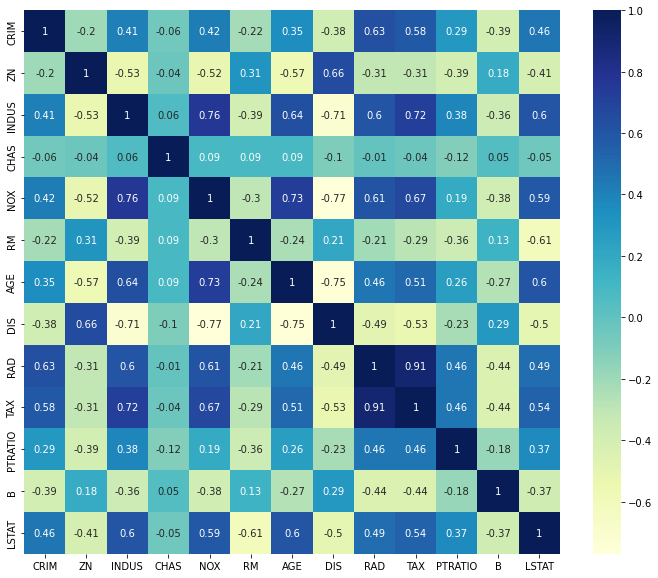

In [46]:
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
correlation_matrix = bos.corr().round(2)
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(ax=ax, data=correlation_matrix, annot=True, cmap="YlGnBu")

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

## Linear regressor as a comparision

4.672548554009624


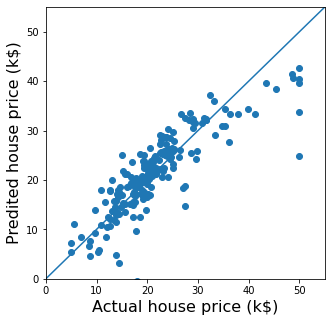

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

plt.subplots(figsize=(5,5))
plt.xlim(0., 1.1*np.max(y_test))
plt.ylim(0., 1.1*np.max(y_test))
plt.xlabel("Actual house price (k$)", fontsize=16)
plt.ylabel("Predited house price (k$)", fontsize=16)
plt.scatter(y_test, y_pred_lr)
xv = np.linspace(0., 1.1*np.max(y_test), 100)
plt.plot(xv, xv)

rms = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(rms)

## Define Multi-layer perceptron

root mean square error 4.07


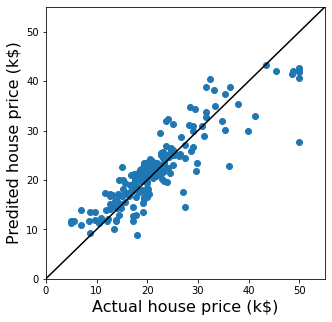

In [49]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', random_state=1, max_iter=5000)
mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

plt.subplots(figsize=(5,5))
plt.xlim(0., 1.1*np.max(y_test))
plt.ylim(0., 1.1*np.max(y_test))
plt.xlabel("Actual house price (k$)", fontsize=16)
plt.ylabel("Predited house price (k$)", fontsize=16)
plt.scatter(y_test, y_pred_mlp)
xv = np.linspace(0., 1.1*np.max(y_test), 100)
plt.plot(xv, xv, 'black')

rms = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
print(f"root mean square error {rms:.2f}")
plt.savefig("boston_house_prices.pdf")

## Plot mean square error vs. training epoch

Text(0, 0.5, 'mean square error')

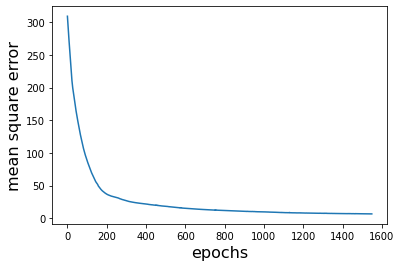

In [50]:
# plt.plot(mlp.loss_curve_)
n_epochs = len(mlp.loss_curve_)
i_epoch = [ i for i in range(n_epochs)]
plt.plot(i_epoch, mlp.loss_curve_)
plt.xlabel('epochs', fontsize=16)
plt.ylabel('mean square error', fontsize=16)

## Hyperparameter optimization

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'hidden_layer_sizes': [(10,), (20,), (100,), (200,)]}
]

rgr = GridSearchCV(
    MLPRegressor(activation='logistic', random_state=1, max_iter=5000), 
    param_grid, scoring='neg_mean_squared_error', cv=5)

rgr.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=MLPRegressor(activation='logistic', max_iter=5000,
                                    random_state=1),
             param_grid=[{'hidden_layer_sizes': [(10,), (20,), (100,),
                                                 (200,)]}],
             scoring='neg_mean_squared_error')

In [52]:
rgr.cv_results_

{'mean_fit_time': array([3.729176  , 2.51068335, 2.35984077, 2.52604375]),
 'std_fit_time': array([0.89977948, 0.55054404, 0.18684474, 0.60431823]),
 'mean_score_time': array([0.0005868 , 0.00057273, 0.00080714, 0.00114903]),
 'std_score_time': array([1.74742440e-05, 6.24165087e-06, 1.11718031e-04, 5.17490469e-04]),
 'param_hidden_layer_sizes': masked_array(data=[(10,), (20,), (100,), (200,)],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layer_sizes': (10,)},
  {'hidden_layer_sizes': (20,)},
  {'hidden_layer_sizes': (100,)},
  {'hidden_layer_sizes': (200,)}],
 'split0_test_score': array([-59.35956867, -39.11902624, -28.1151561 , -29.65411621]),
 'split1_test_score': array([-60.2577664 , -34.42977943, -23.71839834, -24.9899842 ]),
 'split2_test_score': array([-67.82444572, -58.93719717, -27.84980916, -26.52270407]),
 'split3_test_score': array([-21.48503269, -18.19191322, -15.77632564, -15.30586113]),
 'split4_

In [53]:
mse = np.sqrt(-rgr.cv_results_['mean_test_score'])
var = np.arange(1, mse.size+1)

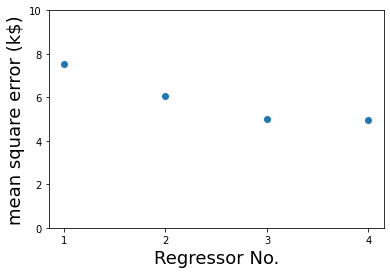

In [58]:
fig, ax = plt.subplots()
ax.plot(var, mse, 'o')
ax.set_ylim(0, 10)
ax.set_xlabel("Regressor No.", fontsize=18)
ax.set_ylabel("mean square error (k$)", fontsize=18)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))